In [1]:
import pandas as pd
import re
from tqdm import tqdm_notebook

blockDf = pd.read_csv("block-city-mapping.csv")
cityDf = pd.read_csv("city-basics_iowa.csv")

blockDf["Census Block ID"] = blockDf["Census Block ID"].apply(lambda x: str(x))

censusDict = blockDf[["Census Block ID", "City"]].set_index("Census Block ID").to_dict()["City"]
latDict = blockDf[["City", "Lat"]].set_index("City").to_dict()["Lat"]
lonDict = blockDf[["City", "Lon"]].set_index("City").to_dict()["Lon"]

In [2]:
def getCity(censusBlock):
    return censusDict[censusBlock]

years = ["2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]
lodesFile = "LODES-Data/ia_od_main_JT00_YYYY.csv"

jobDict = dict()
workDict = dict()

for theYear in years:
    myFile = re.sub("YYYY", theYear, lodesFile)
    lodes_df = pd.DataFrame()
    lodes_df = pd.read_csv(myFile)
    lodes_df = lodes_df.drop(['createdate'], axis=1)
    lodes_df.columns = ["work block", "home block", "total jobs", "Age [0-29]", "Age [30-54]", "Age [55+]", "Salary, Monthly [0-1250]", "Salary, Monthly [1251-3333]", "Salary, Monthly [3334+]", "Jobs: Goods Producing", "Jobs: Trade, Transport, Utilities", "Jobs: Other"]
    lodes_df["wb census"] = lodes_df["work block"].apply(lambda x: str(x)[:12])
    lodes_df["hb census"] = lodes_df["home block"].apply(lambda x: str(x)[:12])
    lodes_df = lodes_df.drop(['work block', 'home block'], axis=1)
    lodes_df = lodes_df.groupby(['wb census', 'hb census']).sum().reset_index()
    lodes_df["home city"] = lodes_df["hb census"].apply(getCity)
    lodes_df = lodes_df.drop("hb census", axis=1)
    lodes_df["work city"] = lodes_df["wb census"].apply(getCity)
    lodes_df = lodes_df.drop("wb census", axis=1)
    jobFlow = lodes_df
    workFlow = lodes_df
#    jobFlow.sort_values(["home city", "work city"], inplace=True)
#    jobFlow.set_index(["home city", "work city"], inplace=True)
    jobFlow = pd.pivot_table(jobFlow, index=["home city", "work city"], aggfunc=sum).reset_index()
#    workFlow.sort_values(["work city", "home city"], inplace=True)
#    workFlow.set_index(["work city", "home city"], inplace=True)    
    workFlow = pd.pivot_table(workFlow, index=["work city", "home city"], aggfunc=sum).reset_index()
    jobFlow["Year"] = theYear
    workFlow["Year"] = theYear
    
    jobDict[theYear] = jobFlow
    workDict[theYear] = workFlow
        
jobDict["2010"].loc[jobDict["2010"]["home city"] == "Elma, IA"].sort_values("total jobs", ascending=0)

,home city,work city,Age [0-29],Age [30-54],Age [55+],Jobs: Goods Producing,Jobs: Other,"Jobs: Trade, Transport, Utilities","Salary, Monthly [0-1250]","Salary, Monthly [1251-3333]","Salary, Monthly [3334+]",total jobs,Year
23742,"Elma, IA","Cresco, IA",11,32,13,28,24,4,8,37,11,56,2010
23768,"Elma, IA","McIntire, IA",7,15,11,9,8,16,8,20,5,33,2010
23774,"Elma, IA","Osage, IA",5,10,1,7,7,2,2,10,4,16,2010
23748,"Elma, IA","Elma, IA",0,7,7,0,11,3,6,5,3,14,2010
23770,"Elma, IA","New Hampton, IA",2,8,4,8,3,3,4,8,2,14,2010
23739,"Elma, IA","Chester, IA",4,4,2,4,0,6,2,6,2,10,2010
23767,"Elma, IA","Mason City, IA",2,3,3,2,6,0,3,3,2,8,2010
23737,"Elma, IA","Charles City, IA",0,5,3,0,7,1,5,1,2,8,2010
23777,"Elma, IA","Protivin, IA",4,2,2,2,4,2,1,7,0,8,2010
23783,"Elma, IA","Waterloo, IA",0,6,1,1,5,1,3,2,2,7,2010


In [3]:
jobDict["2008"].loc[jobDict["2008"]["home city"] == "Ogden, IA"]

,home city,work city,Age [0-29],Age [30-54],Age [55+],Jobs: Goods Producing,Jobs: Other,"Jobs: Trade, Transport, Utilities","Salary, Monthly [0-1250]","Salary, Monthly [1251-3333]","Salary, Monthly [3334+]",total jobs,Year
50090,"Ogden, IA","Ackworth, IA",0,1,0,0,1,0,1,0,0,1,2008
50091,"Ogden, IA","Adair, IA",0,1,0,0,0,1,0,1,0,1,2008
50092,"Ogden, IA","Adel, IA",1,0,1,0,2,0,0,2,0,2,2008
50093,"Ogden, IA","Alden, IA",0,1,0,1,0,0,0,0,1,1,2008
50094,"Ogden, IA","Algona, IA",1,0,0,0,0,1,1,0,0,1,2008
50095,"Ogden, IA","Allison, IA",1,0,0,0,1,0,0,0,1,1,2008
50096,"Ogden, IA","Altoona, IA",1,6,1,0,3,5,0,2,6,8,2008
50097,"Ogden, IA","Ames, IA",83,204,96,68,269,46,73,126,184,383,2008
50098,"Ogden, IA","Anita, IA",1,0,0,0,0,1,0,1,0,1,2008
50099,"Ogden, IA","Ankeny, IA",3,7,6,2,8,6,3,5,8,16,2008


In [4]:
for theYear in years:
    cities = jobDict[theYear]["home city"].unique()
    for cityName in cities:
        fileName = "pipeline_output/" + theYear + "_" + re.sub("\s|,", "", cityName) + "_to_other.csv"
        jobDf = jobDict[theYear].loc[jobDict[theYear]["home city"] == cityName].sort_values("total jobs", ascending=0)
        jobDf.to_csv(fileName)
        
        fileName = "pipeline_output/" + theYear + "_other_to_" + re.sub("\s|,", "", cityName) + ".csv"
        workDf = workDict[theYear].loc[workDict[theYear]["work city"] == cityName].sort_values("total jobs", ascending=0)
        workDf.to_csv(fileName)

('Osceola, IA', 72.049999999999997, -0.84999999999999998, -32.125)

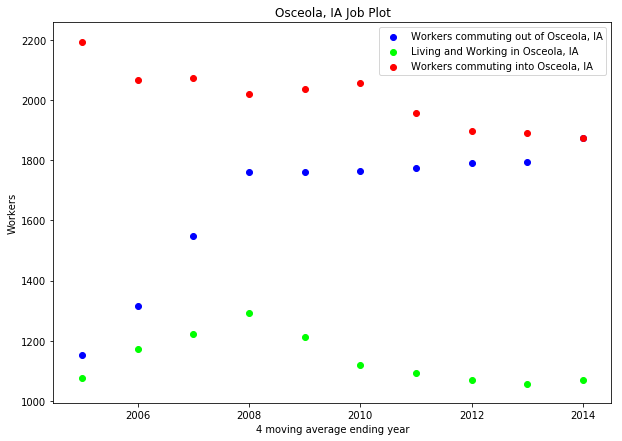

In [314]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def calcSlope(jobList):
    last = jobList[0]
    slope = 0.0
    for data in jobList[1:]:
        slope = slope + (data - last)
        last = data
    slope = slope / len(jobList)
    return(slope)

city = "Osceola, IA"

cityJobStats = dict()

for theYear in years:
    commutersDf = jobDict[theYear].loc[jobDict[theYear]["home city"] == city].sort_values("total jobs", ascending=0)
    commuters = pd.pivot_table(commutersDf.loc[commutersDf["work city"] != city], index=["home city"], aggfunc=sum).reset_index()["total jobs"][0]
    workHome = pd.pivot_table(commutersDf.loc[commutersDf["work city"] == city], index=["home city"], aggfunc=sum).reset_index()["total jobs"][0]
    workersDf = workDict[theYear].loc[workDict[theYear]["work city"] == city].sort_values("total jobs", ascending=0)
    workers = pd.pivot_table(workersDf.loc[workersDf["home city"] != city], index=["work city"], aggfunc=sum).reset_index()["total jobs"][0]
    cityJobStats[theYear] = (commuters, workHome, workers)
    
commuterStack = []
workHomeStack = []
workersStack = []
avgLen = 4
plotData = dict()
for key, value in cityJobStats.items():
    if (len(commuterStack) >= avgLen):
        commuterStack.remove(commuterStack[0])
        workHomeStack.remove(workHomeStack[0])
        workersStack.remove(workersStack[0])
    commuterStack.append(value[0])
    workHomeStack.append(value[1])
    workersStack.append(value[2])
    if (len(commuterStack) == avgLen):
        plotData[key] = [sum(commuterStack)/avgLen, sum(workHomeStack)/avgLen, sum(workersStack)/avgLen]
        
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
x = (list(plotData.keys()))
y = list(pd.Series(pd.DataFrame(plotData).iloc[0]))
plt.scatter(x, y, c="#0000ff", label=("Workers commuting out of " + city))
x = (list(plotData.keys()))
y = list(pd.Series(pd.DataFrame(plotData).iloc[1]))
plt.scatter(x, y, c="#00ff00", label=("Living and Working in " + city))
x = (list(plotData.keys()))
y = list(pd.Series(pd.DataFrame(plotData).iloc[2]))
plt.scatter(x, y, c="#ff0000", label=("Workers commuting into " + city))
plt.legend()
plt.title(city + " Job Plot")
plt.xlabel(str(avgLen) + " moving average ending year")
plt.ylabel("Workers")
#jobPlot.apply(lambda x: ax.annotate(x["work city"], xy=(x["x"],x["y"]), size=20), axis=1)
(city, calcSlope(list(pd.Series(pd.DataFrame(plotData).iloc[0]))), calcSlope(list(pd.Series(pd.DataFrame(plotData).iloc[1]))), calcSlope(list(pd.Series(pd.DataFrame(plotData).iloc[2]))))